In [1]:
 # Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
from numpy.random import seed
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


seed(1)

type1_array = []
legendary_array = []

pokedex = pd.read_csv('Pokemon.csv')
pokedex.head()


y = pokedex['Legendary']
y2 = pokedex['Type 1']

X = pokedex.drop("Legendary", axis=1)
X = X.drop("#", axis=1)
X = X.drop("Name", axis=1)
X = X.drop("Type 1", axis=1)
X = X.drop("Type 2", axis=1)
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [2]:
# All Models - Type 1

scores = []
for i in range(0,51):
    #Neural Network
    X_train, X_test, y_train, y_test = train_test_split(X, y2, stratify=y2, random_state=i)
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    label_encoder = LabelEncoder()

    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.fit_transform(y_test)

    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)
    
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=8))
    model.add(Dense(units=18, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    history = model.fit(
        X_train_scaled,
        y_train_categorical,
        epochs=100,
        shuffle = True,
        verbose = 0,
        validation_data=(X_test_scaled,y_test_categorical)
    )
    model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=0)
    

    #scores.append(model_accuracy)
    print('NN Test Acc: %.3f' % model_accuracy)
    
    #KNN 
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train_scaled, y_train)
    knn_score = knn.score(X_test_scaled, y_test)
    #scores.append(knn_score)
    print('KNN Test Acc: %.3f' % knn_score)
    
    #Random Forest
    
    rf = RandomForestClassifier (n_estimators=300)
    rf = rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    
    #scores.append(rf_score)
    print('RF Test Acc: %.3f' % rf_score)
    
    # SVM
    
    svm_model = SVC(kernel='linear')

    svm_model.fit(X_train, y_train)
    
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    
    svm_score = svm_model.score(X_test, y_test)
    
    print('SVM Test Acc: %.3f' % svm_score)
    

    
    type1_array.append([model_accuracy, knn_score, rf_score, svm_score])


type1_df = pd.DataFrame(type1_array, columns = ['Neural Network', 'KNN', 'Random Forest', 'SVM'])

type1_df.to_csv('type1_models.csv')

type1_df.head()

NN Test Acc: 0.190
KNN Test Acc: 0.195
RF Test Acc: 0.235
SVM Test Acc: 0.265
NN Test Acc: 0.200
KNN Test Acc: 0.185
RF Test Acc: 0.270
SVM Test Acc: 0.255
NN Test Acc: 0.255
KNN Test Acc: 0.215
RF Test Acc: 0.240
SVM Test Acc: 0.270
NN Test Acc: 0.195
KNN Test Acc: 0.210
RF Test Acc: 0.205
SVM Test Acc: 0.170
NN Test Acc: 0.235
KNN Test Acc: 0.245
RF Test Acc: 0.315
SVM Test Acc: 0.235
NN Test Acc: 0.205
KNN Test Acc: 0.205
RF Test Acc: 0.250
SVM Test Acc: 0.270
NN Test Acc: 0.230
KNN Test Acc: 0.245
RF Test Acc: 0.240
SVM Test Acc: 0.250
NN Test Acc: 0.210
KNN Test Acc: 0.200
RF Test Acc: 0.235
SVM Test Acc: 0.220
NN Test Acc: 0.200
KNN Test Acc: 0.205
RF Test Acc: 0.255
SVM Test Acc: 0.260
NN Test Acc: 0.180
KNN Test Acc: 0.180
RF Test Acc: 0.250
SVM Test Acc: 0.230
NN Test Acc: 0.210
KNN Test Acc: 0.195
RF Test Acc: 0.210
SVM Test Acc: 0.260
NN Test Acc: 0.200
KNN Test Acc: 0.215
RF Test Acc: 0.245
SVM Test Acc: 0.190
NN Test Acc: 0.235
KNN Test Acc: 0.190
RF Test Acc: 0.295
SVM Te

,Neural Network,KNN,Random Forest,SVM
0,0.190,0.195,0.235,0.265
1,0.200,0.185,0.270,0.255
2,0.255,0.215,0.240,0.270
3,0.195,0.210,0.205,0.170
4,0.235,0.245,0.315,0.235


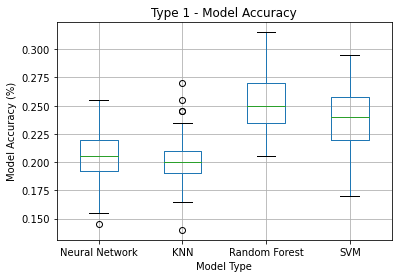

In [3]:
boxplot = type1_df.boxplot(column=['Neural Network', 'KNN', 'Random Forest', 'SVM'])

boxplot.set_title('Type 1 - Model Accuracy')
boxplot.set_xlabel('Model Type')
boxplot.set_ylabel('Model Accuracy (%)')


boxplot.figure.savefig('type1_accuracy.png')

In [4]:
# Comparison of Predictions By Type 1
predictions = pokedex[['Name',"Type 1"]]
# KNN Predictions
predicted_class_knn = label_encoder.inverse_transform(knn.predict(X_scaler.transform(X)))
# Neural Network Predictions
predicted_class_nn = label_encoder.inverse_transform(model.predict_classes(X_scaler.transform(X)))
# Random Forest Predictions
predicted_class_rf = label_encoder.inverse_transform(rf.predict(X))
# SVM Predictions
predicted_class_svm = label_encoder.inverse_transform(svm_model.predict(X))
# Creating a dataframe to compare data
predictions['KNN Prediction'] = predicted_class_knn
predictions['Neural Network Prediction'] = predicted_class_nn
predictions['Random Forest Preduction'] = predicted_class_rf
predictions['SVM Prediction'] = predicted_class_svm


predictions.to_csv('type1_predictions_accuracy.csv')

predictions.head(40)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<ipython-input-4-6deeef706ece>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['KNN Prediction'] = predicted_class_knn
<ipython-input-4-6deeef706ece>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Neural Network Prediction'] = predicted_class_nn
<ipython-input-4-6deeef706ece>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Name,Type 1,KNN Prediction,Neural Network Prediction,Random Forest Preduction,SVM Prediction
0,Bulbasaur,Grass,Fire,Water,Grass,Water
1,Ivysaur,Grass,Grass,Water,Grass,Water
2,Venusaur,Grass,Water,Water,Grass,Water
3,VenusaurMega Venusaur,Grass,Fire,Water,Grass,Water
4,Charmander,Fire,Water,Water,Fire,Water
5,Charmeleon,Fire,Normal,Water,Fire,Water
6,Charizard,Fire,Fire,Water,Fire,Water
7,CharizardMega Charizard X,Fire,Fire,Grass,Fire,Water
8,CharizardMega Charizard Y,Fire,Fire,Water,Psychic,Psychic
9,Squirtle,Water,Normal,Water,Water,Water


In [5]:
# All Models - Legendary Status

scores = []
for i in range(0,51):
    #Neural Network
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=i)
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    label_encoder = LabelEncoder()


    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)
    
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=8))
    model.add(Dense(units=2, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    history = model.fit(
        X_train_scaled,
        y_train_categorical,
        epochs=100,
        shuffle = True,
        verbose = 0,
        validation_data=(X_test_scaled,y_test_categorical)
    )
    model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=0)
    

    print('NN Test Acc: %.3f' % model_accuracy)
    
    #KNN 
    
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train_scaled, y_train)
    knn_score = knn.score(X_test_scaled, y_test)
    print('KNN Test Acc: %.3f' % knn_score)
    
    #Random Forest
    
    rf = RandomForestClassifier (n_estimators=300)
    rf = rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    
    print('RF Test Acc: %.3f' % rf_score)
    
    # SVM
    
    model = SVC(kernel='linear')

    model.fit(X_train, y_train)
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    
    svm_score = model.score(X_test, y_test)
    
    print('SVM Test Acc: %.3f' % svm_score)
    

    
    legendary_array.append([model_accuracy, knn_score, rf_score, svm_score])


legendary_df = pd.DataFrame(legendary_array, columns = ['Neural Network', 'KNN', 'Random Forest', 'SVM'])

legendary_df.to_csv('lengendary_models.csv')

legendary_df.head()

NN Test Acc: 0.945
KNN Test Acc: 0.945
RF Test Acc: 0.950
SVM Test Acc: 0.940
NN Test Acc: 0.920
KNN Test Acc: 0.930
RF Test Acc: 0.940
SVM Test Acc: 0.925
NN Test Acc: 0.950
KNN Test Acc: 0.940
RF Test Acc: 0.960
SVM Test Acc: 0.955
NN Test Acc: 0.940
KNN Test Acc: 0.945
RF Test Acc: 0.960
SVM Test Acc: 0.950
NN Test Acc: 0.950
KNN Test Acc: 0.945
RF Test Acc: 0.955
SVM Test Acc: 0.945
NN Test Acc: 0.960
KNN Test Acc: 0.935
RF Test Acc: 0.950
SVM Test Acc: 0.920
NN Test Acc: 0.945
KNN Test Acc: 0.945
RF Test Acc: 0.970
SVM Test Acc: 0.945
NN Test Acc: 0.930
KNN Test Acc: 0.940
RF Test Acc: 0.960
SVM Test Acc: 0.925
NN Test Acc: 0.960
KNN Test Acc: 0.950
RF Test Acc: 0.970
SVM Test Acc: 0.965
NN Test Acc: 0.945
KNN Test Acc: 0.950
RF Test Acc: 0.960
SVM Test Acc: 0.935
NN Test Acc: 0.945
KNN Test Acc: 0.960
RF Test Acc: 0.950
SVM Test Acc: 0.955
NN Test Acc: 0.940
KNN Test Acc: 0.930
RF Test Acc: 0.930
SVM Test Acc: 0.915
NN Test Acc: 0.955
KNN Test Acc: 0.935
RF Test Acc: 0.950
SVM Te

,Neural Network,KNN,Random Forest,SVM
0,0.945,0.945,0.950,0.940
1,0.920,0.930,0.940,0.925
2,0.950,0.940,0.960,0.955
3,0.940,0.945,0.960,0.950
4,0.950,0.945,0.955,0.945


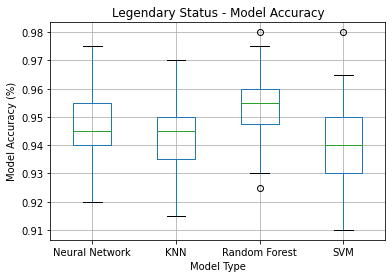

In [6]:
boxplot = legendary_df.boxplot(column=['Neural Network', 'KNN', 'Random Forest', 'SVM'])

boxplot.set_title('Legendary Status - Model Accuracy')
boxplot.set_xlabel('Model Type')
boxplot.set_ylabel('Model Accuracy (%)')

boxplot.figure.savefig('legendary_accuracy.png')
